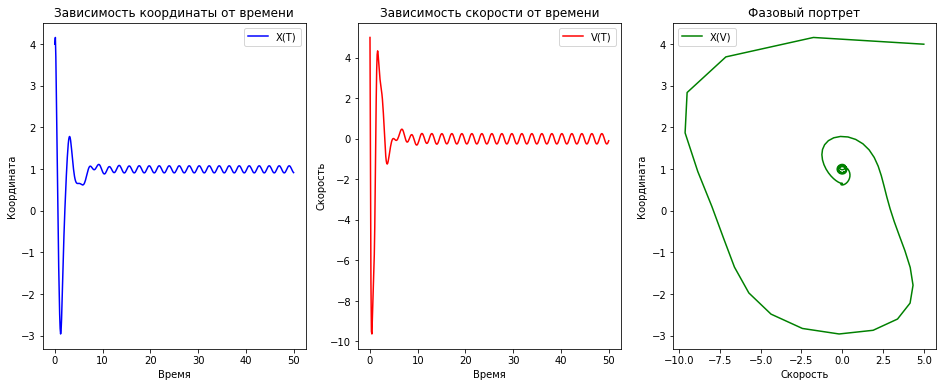

In [ ]:
# Подключаем нужные библиотеки
# math - для cos, pyplot - для графиков, tkinter - для окна ввода
import math

import matplotlib.pyplot as plt
import tkinter as tk

c = 0; h = 0.1
f = 0.65; w = 1.2
# Начальная координата и скорость
x = 1; v = 0

# Номер фигуры
num_figure = 1

a = 0; b = 50; h = 0.1
n = (b - a) / h
K1 = []; L1 = []; K2 = []; L2 = []; K3 = []; L3 = []; K4 = []; L4 = []
X = []; Z = []; T  = []

def G(A, B, T):
	g = -c * A + B - pow(B, 3) + f * math.cos(w * T)
	return g

def func(z):
	return z

def runge_kutta():
    # Говорим функции, что работаем с глобальными переменными
    global K1, K2, K3, K4, L1, L2, L3, L4, X, Z, T
    # Перед каждым новым графиком обнуляем значения массивов
    K1 = []; L1 = []; K2 = []; L2 = []; K3 = []; L3 = []; K4 = []; L4 = []
    X = []; Z = []; T  = []
    X.append(x)
    Z.append(v)
    T.append(0)
    for i in range(int(n)):
        K1.append(h * func(Z[i]))
        L1.append(h * G(Z[i], X[i], T[i]))
    
        K2.append(h * func(Z[i] + 0.5 * L1[i]))
        L2.append(h * G(Z[i] + 0.5 * L1[i], X[i] + 0.5 * K1[i], T[i] + 0.5 * h))

        K3.append(h * func(Z[i] + 0.5 * L2[i]))
        L3.append(h * G(Z[i] + 0.5 * L2[i], X[i] + 0.5 * K2[i], T[i] + 0.5 * h))

        K4.append(h * func(Z[i] + L3[i]))
        L4.append(h * G(Z[i] + L3[i], X[i] + K3[i], T[i] + h))

        X.append(X[i] + (K1[i] + 2 * K2[i] + 2 * K3[i] + K4[i]) / 6)
        Z.append(Z[i] + (L1[i] + 2 * L2[i] + 2 * L3[i] + L4[i]) / 6)
        T.append(h + T[i])

def get_all():
    # Считываем данные с окна при нажатии кнопки ввод
    global c, F, w, x, v
    # float строку преобразует в числа с плавающей точкой
    c = float(entry_c.get())
    F = float(entry_F.get())
    w = float(entry_w.get())
    x = float(entry_x.get())
    v = float(entry_v.get())
    runge_kutta()

def plotting():
    global num_figure
    # Создаем окно с размером 16х6
    plt.figure(num_figure, figsize=(16, 6))
    # Увеличиваем номер фигуры, чтобы в следующий раз создавалось новое окно
    num_figure += 1

    # Первый подграфик слева, 1 х 3 х 1 задает расположение
    plt.subplot(1, 3, 1)
    plt.title("Зависимость координаты от времени")
    plt.plot(T, X, label = 'X(T)', color = 'b')
    plt.xlabel('Время')
    plt.ylabel('Координата')
    # Legend - выводим подпись графика X(T) в маленькое окошко 
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.title("Зависимость скорости от времени")
    plt.plot(T, Z, label = 'V(T)', color = 'r')
    plt.xlabel('Время')
    plt.ylabel('Скорость')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.title("Фазовый портрет")
    plt.plot(Z, X, label = 'X(V)', color = 'g')
    plt.xlabel('Скорость')
    plt.ylabel('Координата')
    plt.legend()

    # Выводим графики
    plt.show()

# Создаем окно для ввода, задаем размер
window = tk.Tk()
window.geometry('500x425')
# Label - подпись над строкой для ввода, entry - строка ввода
# bd в entry - размер границы вокруг строки для ввода
label_c = tk.Label(text="с")
entry_c = tk.Entry(bd = 3)
# pack() - выводим элементы в окно
label_c.pack()
entry_c.pack()
label_F = tk.Label(text="F")
entry_F = tk.Entry(bd = 3)
label_F.pack()
entry_F.pack()
label_w = tk.Label(text="w")
entry_w = tk.Entry(bd = 3)
label_w.pack()
entry_w.pack()
label_x = tk.Label(text="x")
entry_x = tk.Entry(bd = 3)
label_x.pack()
entry_x.pack()
label_v = tk.Label(text="v")
entry_v = tk.Entry(bd = 3)
label_v.pack()
entry_v.pack()
label_empty = tk.Label(text="")
label_empty.pack()
# Создаем кнопку ввода и кнопку построения графиков
# command - функция, которая вызывается при нажатии кнопки, описаны выше
button_upload = tk.Button(
    text = "Ввод",
    width = 10,
    height = 3,
    fg = "blue",
    command = get_all,
)
button_plot = tk.Button(
    text = "Построить",
    width = 10,
    height = 3,
    fg = "red",
    command = plotting,
)
button_upload.pack()
button_plot.pack()
# mainloop() - чтобы программа продолжала работать, пока мы не закрыли окна
window.mainloop()